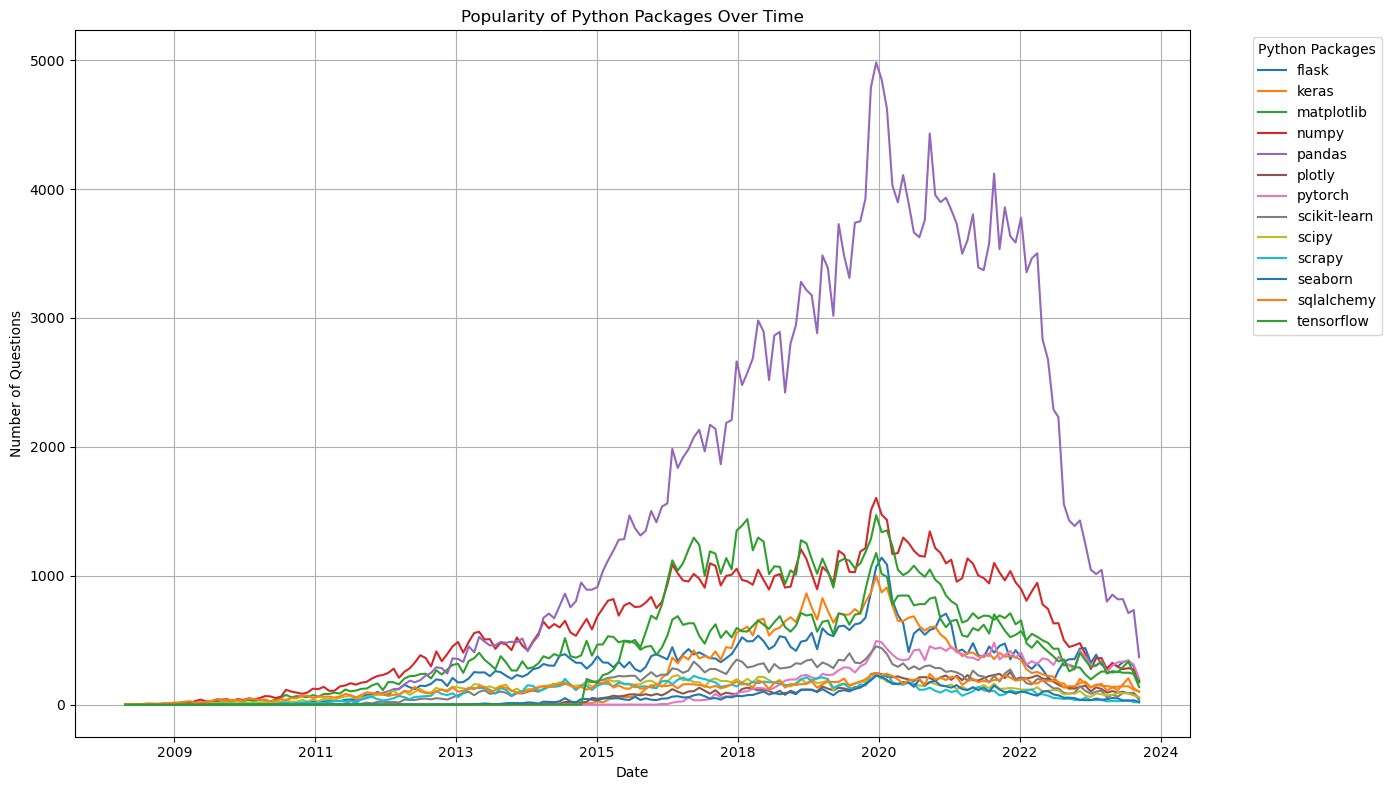

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# load
file_path = 'QueryResults.csv' 
data = pd.read_csv(file_path)

# convert m/y into datetime
data['Date'] = pd.to_datetime(data['Year'].astype(str) + '-' + data['Month'].astype(str) + '-01')

# pivot data for plotting
pivot_data = data.pivot(index='Date', columns='TagName', values='TagCount').fillna(0)

# plot
plt.figure(figsize=(14, 8))
for column in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[column], label=column)

plt.title('Popularity of Python Packages Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Questions')
plt.legend(title='Python Packages', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)

# Set x-axis major locator to year
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))

plt.show()


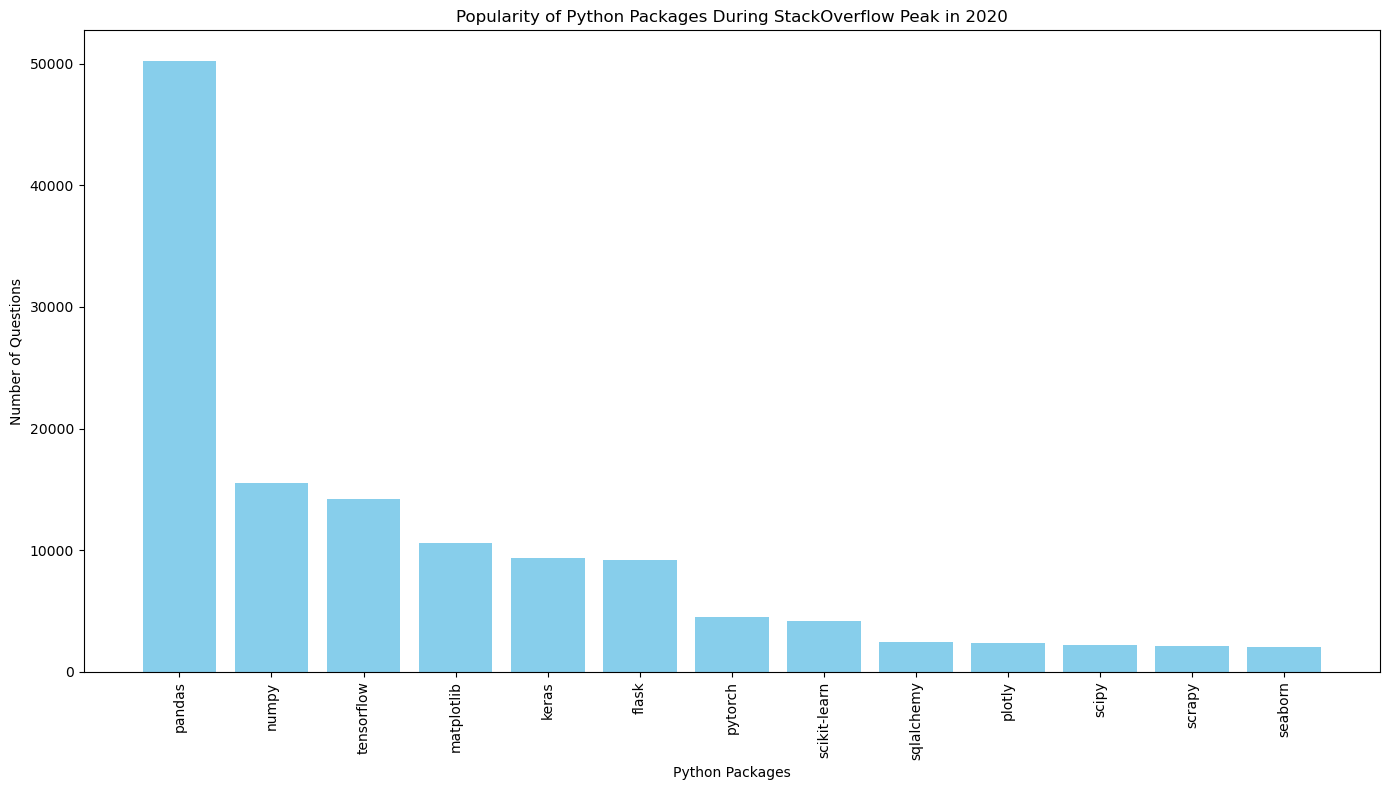

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# load data
file_path = 'QueryResults.csv'  # Replace with the actual file path
data = pd.read_csv(file_path)

# convert m/y to datetime
data['Date'] = pd.to_datetime(data['Year'].astype(str) + '-' + data['Month'].astype(str) + '-01')

# filter for 2020
data_2020 = data[(data['Year'] == 2020)]

# aggrgate tag counts for 2020
data_2020_agg = data_2020.groupby('TagName')['TagCount'].sum().reset_index()

# sort by tagcount
data_2020_agg = data_2020_agg.sort_values(by='TagCount', ascending=False)

# plot
plt.figure(figsize=(14, 8))
plt.bar(data_2020_agg['TagName'], data_2020_agg['TagCount'], color='skyblue')
plt.title('Popularity of Python Packages During StackOverflow Peak in 2020')
plt.xlabel('Python Packages')
plt.ylabel('Number of Questions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


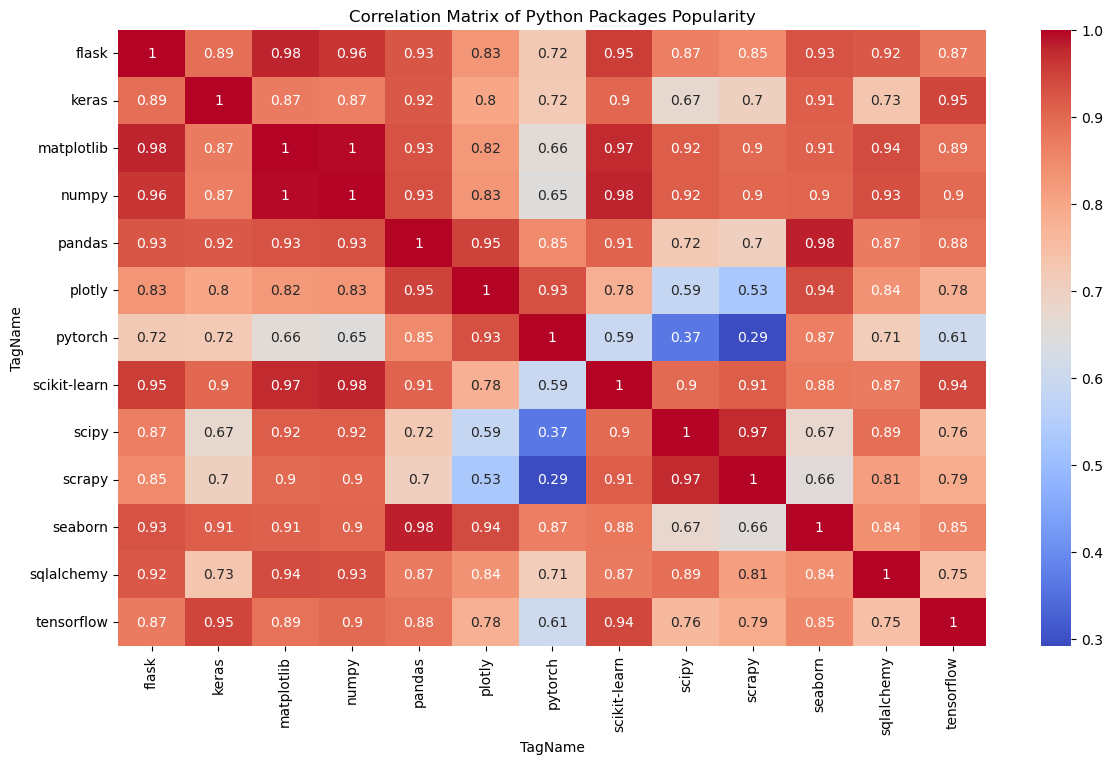

In [21]:
import seaborn as sns

# correlation matrix
correlation_matrix = yearly_data.corr()

# plot
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Python Packages Popularity')
plt.show()


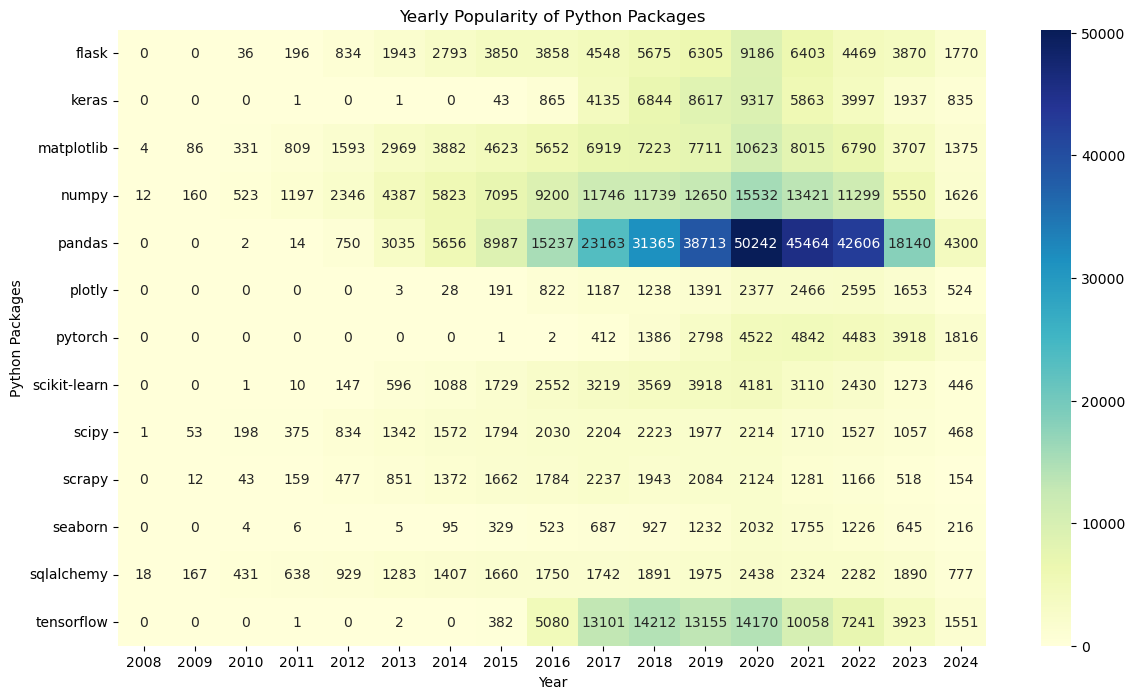

In [25]:
import seaborn as sns

# yearly data
yearly_data = data.groupby(['Year', 'TagName'])['TagCount'].sum().unstack().fillna(0)

# plot
plt.figure(figsize=(14, 8))
sns.heatmap(yearly_data.T, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Yearly Popularity of Python Packages')
plt.xlabel('Year')
plt.ylabel('Python Packages')
plt.show()


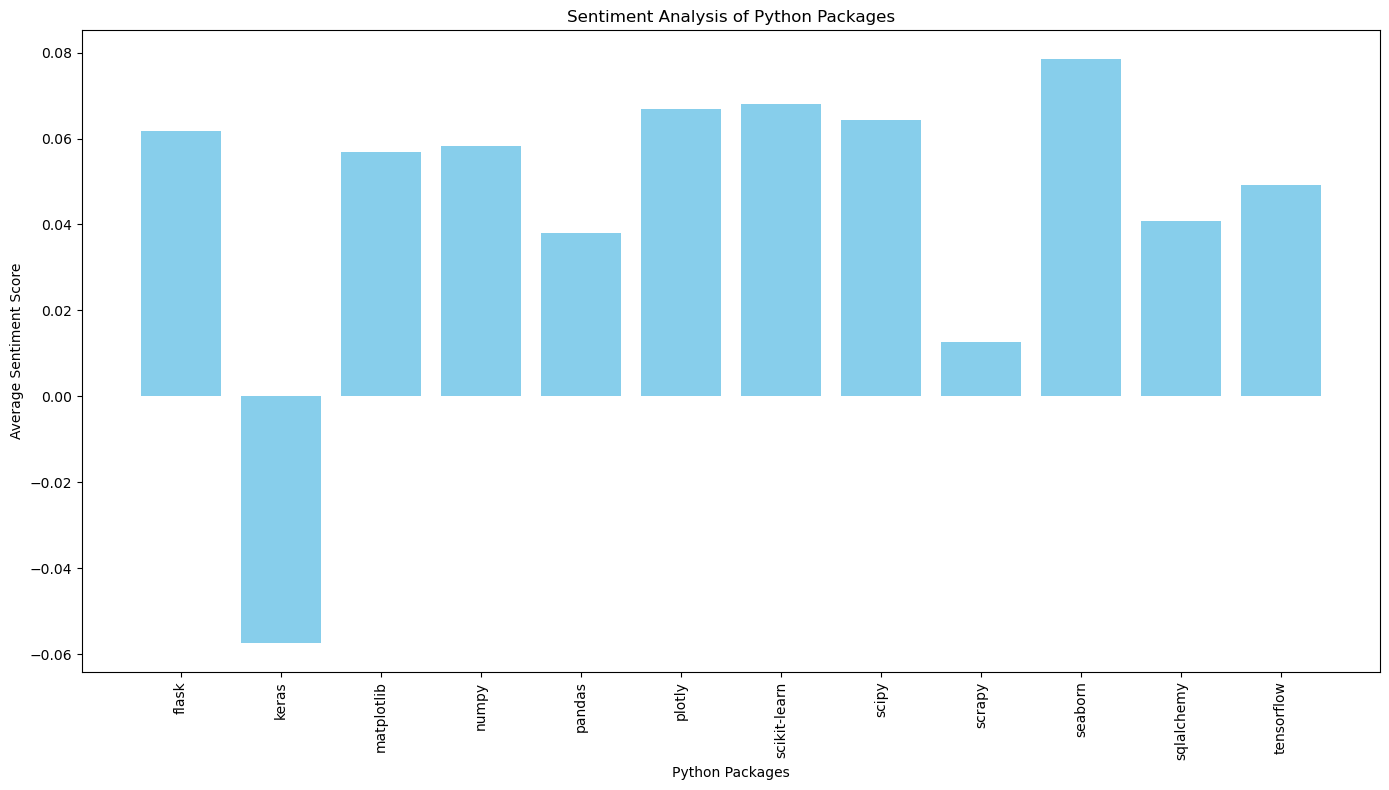

In [33]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# load
file_path2 = 'QueryResults2.csv'
data2 = pd.read_csv(file_path2)

# sentiment analysis
data2['Sentiment'] = data2['PostBody'].apply(lambda x: TextBlob(x).sentiment.polarity)

# aggregate sentiment by package
sentiment_by_package = data2.groupby('TagName')['Sentiment'].mean().reset_index()

# plot
plt.figure(figsize=(14, 8))
plt.bar(sentiment_by_package['TagName'], sentiment_by_package['Sentiment'], color='skyblue')
plt.title('Sentiment Analysis of Python Packages')
plt.xlabel('Python Packages')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
